In [2]:
import astropy.units as u
from specutils import Spectrum
from astrodb_utils.spectra import check_spectrum_plottable
import os
import numpy as np

INFO     - astrodb_utils.publications - logger.parent.name: astrodb_utils, logger.parent.level: 20


In [3]:
path = "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/"

Processing Xshooter_NIR_ULASJ020858.62+020657.0.txt


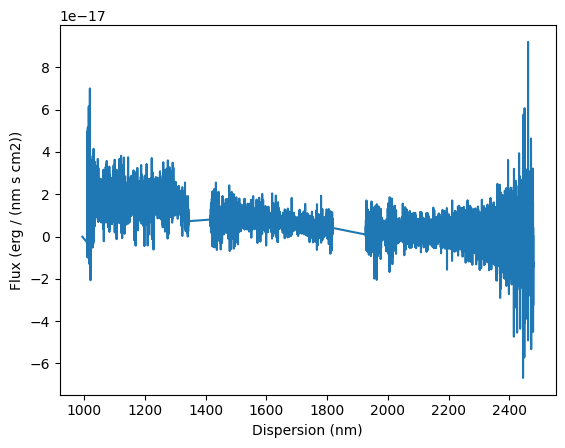

Xshooter_NIR_ULASJ020858.62+020657.0.txt is plottable

Processing Xshooter_NIR_ULASJ223302.03+062030.8.txt


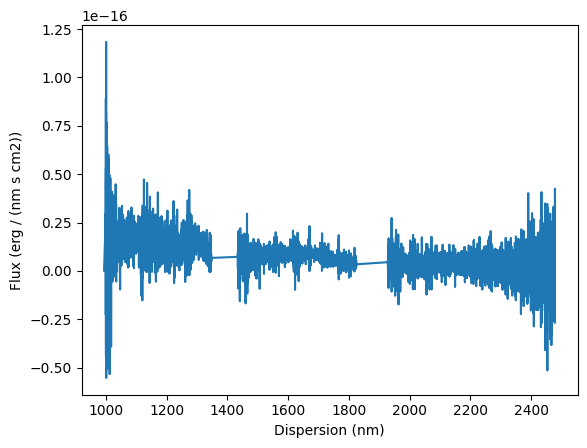

Xshooter_NIR_ULASJ223302.03+062030.8.txt is plottable

Processing Xshooter_NIR_SDSSJ010448.46+153501.8.txt


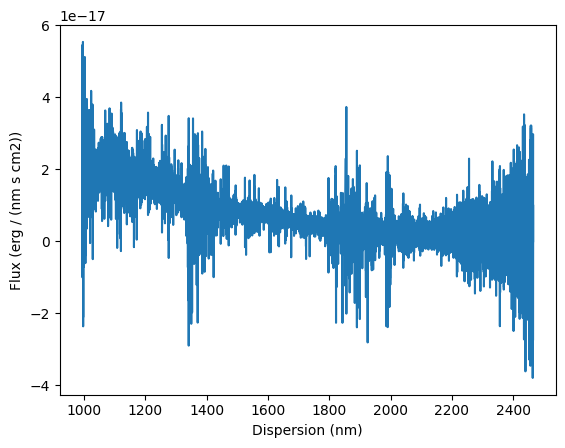

Xshooter_NIR_SDSSJ010448.46+153501.8.txt is plottable

Processing Xshooter_NIR_ULASJ141203.85+121609.9.txt


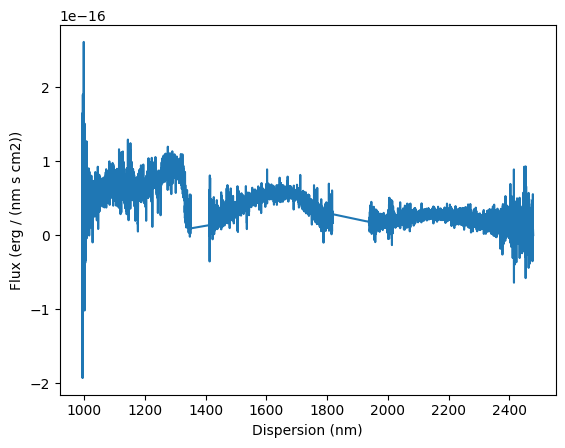

Xshooter_NIR_ULASJ141203.85+121609.9.txt is plottable

Processing Xshooter_NIR_2MASSJ06164006-6407194.txt


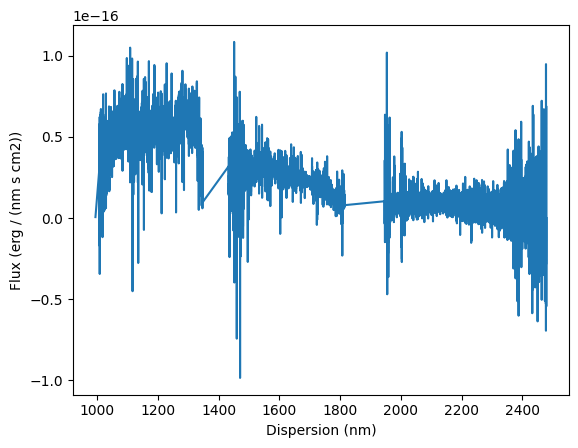

Xshooter_NIR_2MASSJ06164006-6407194.txt is plottable

Processing Xshooter_NIR_ULASJ021642.96+004005.7.txt


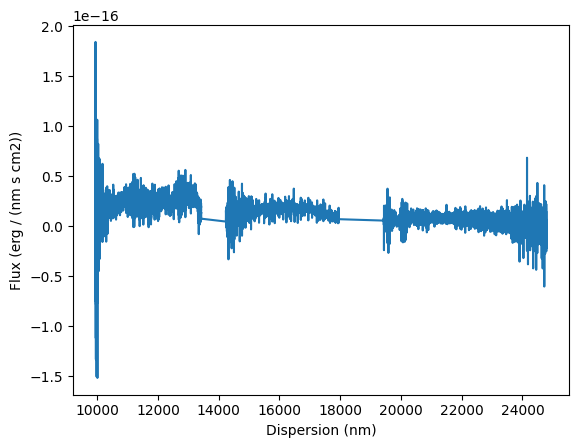

Xshooter_NIR_ULASJ021642.96+004005.7.txt is plottable

Processing Xshooter_NIR_ULASJ230711.01+014447.1.txt


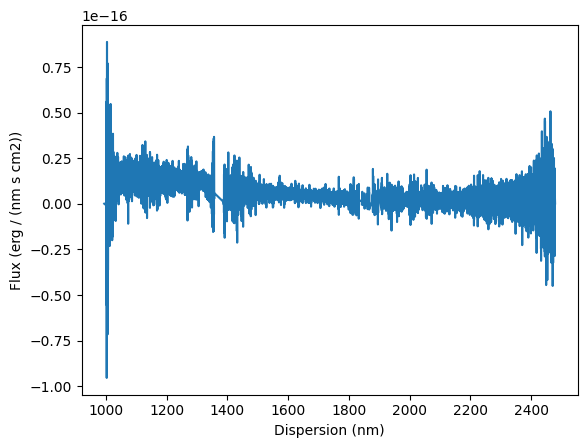

Xshooter_NIR_ULASJ230711.01+014447.1.txt is plottable

Processing Xshooter_NIR_ULASJ151913.03-000030.0.txt


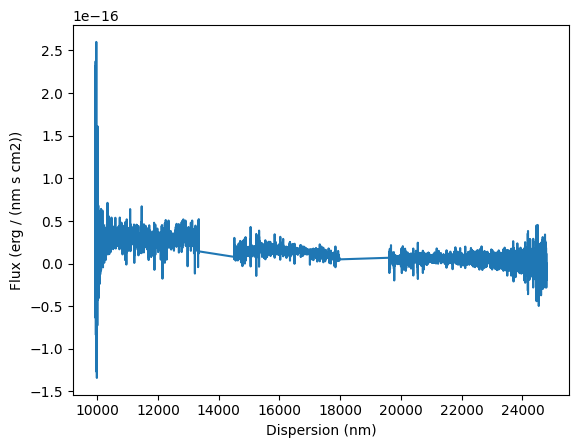

Xshooter_NIR_ULASJ151913.03-000030.0.txt is plottable

Processing Xshooter_NIR_ULASJ024035.36+060629.3.txt


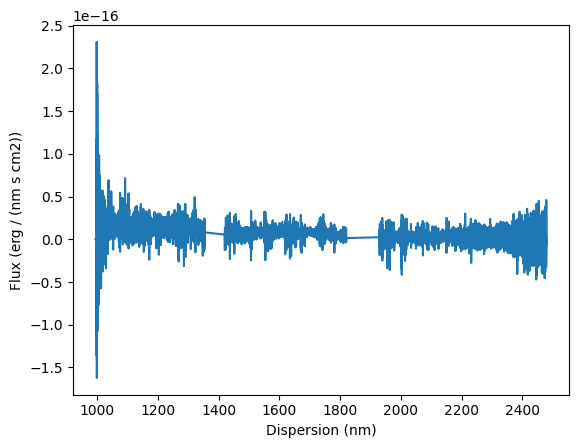

Xshooter_NIR_ULASJ024035.36+060629.3.txt is plottable

Processing Xshooter_NIR_2MASSJ06453153-6646120.txt


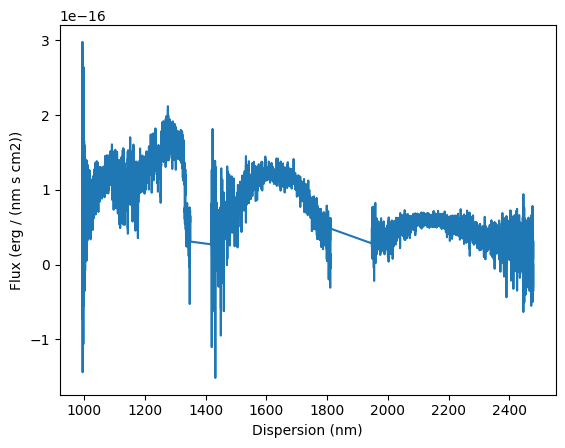

Xshooter_NIR_2MASSJ06453153-6646120.txt is plottable

Ploted files: 10
Failed files: 0


In [5]:
# Process source with spex-prism_NIR files
file_plotted = 0
file_failed = 0

for filename in os.listdir(path):
    if filename.startswith("Xshooter") and filename.endswith(".txt") and not "ULASJ130710.22+151103.4" in filename and not "ULASJ135058.85+081506.8.txt" in filename:
        print(f"Processing {filename}")
        file_path = os.path.join(path, filename)
        data = np.loadtxt(file_path, comments="#", encoding="latin1")

        wavelength = data[:, 0] * u.nm
        flux = data[:, 1] * (u.erg / u.cm**2 / u.s / u.nm)

        spectrum = Spectrum(flux=flux, spectral_axis=wavelength)

        if (check_spectrum_plottable(spectrum, show_plot=True)):
            print(f"{filename} is plottable\n")
            file_plotted += 1
        else:
            file_failed += 1

print(f"Ploted files: {file_plotted}")
print(f"Failed files: {file_failed}")

Processing Xshooter_NIR_ULASJ130710.22+151103.4.txt
This is the masked spectrum:


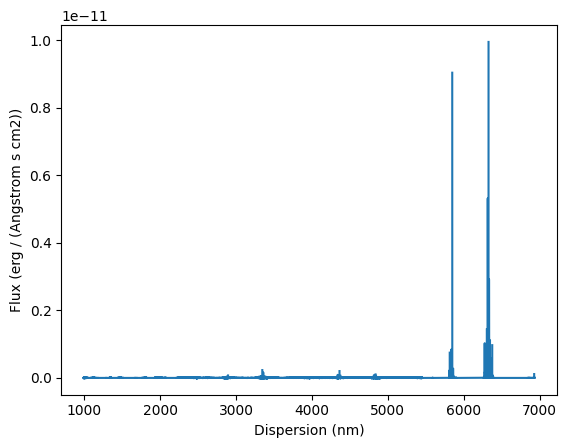

now extract region method:


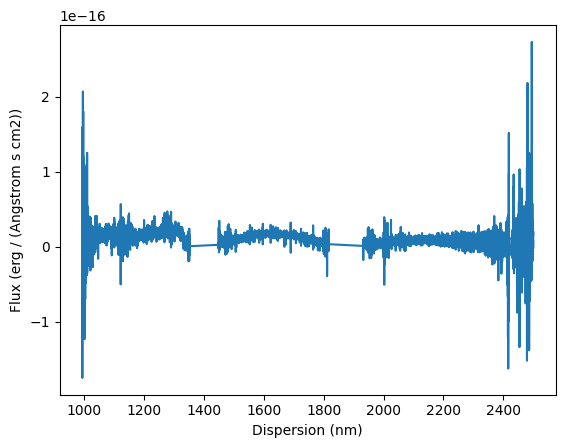

This is the original spectrum:


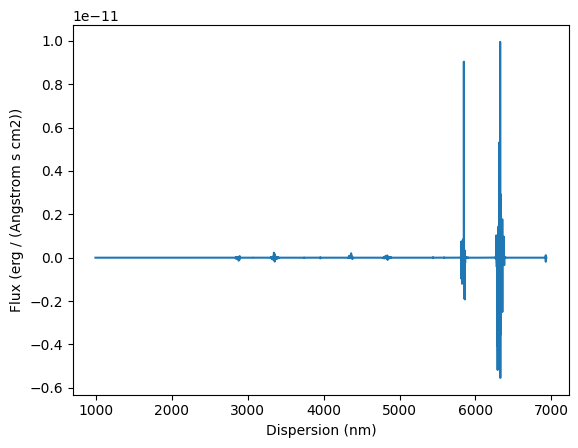

Xshooter_NIR_ULASJ130710.22+151103.4.txt is plottable



In [27]:
# Process ULASJ130710.22+151103.4, use extract region method as the region is specified in the paper 0-2500nm
from specutils.manipulation import extract_region
from specutils.manipulation import snr_threshold
from astropy.nddata import StdDevUncertainty
from specutils import Spectrum, SpectralRegion

for filename in os.listdir(path):
    if "ULASJ130710.22+151103.4" in filename:
        print(f"Processing {filename}")
        file_path = os.path.join(path, filename)
        data = np.loadtxt(file_path, comments="#", encoding="latin1")

        # plot in research paper stops at 2500nm, line25102
        wavelength = data[:, 0] * u.nm
        flux = data[:, 1] * (u.erg / u.cm**2 / u.s / u.AA)
        uncertainty_array = np.abs(flux) * 0.10
        uncertainty = StdDevUncertainty(uncertainty_array)

        # Create a spectrum object
        spectrum = Spectrum(flux=flux, spectral_axis=wavelength, uncertainty=uncertainty)

        extract_spectrum = extract_region(spectrum, SpectralRegion([(0 * u.nm, 2500 * u.nm)]))
        snr_limit = 6
        spectrum_masked = snr_threshold(spectrum, snr_limit)

        # replace masked points with NaN
        masked_flux = spectrum_masked.flux.copy()
        masked_flux[spectrum_masked.mask] = np.nan
        spectrum_masked = Spectrum(
            flux=masked_flux,
            spectral_axis=wavelength,
            uncertainty=StdDevUncertainty(uncertainty_array)
        )
        # Check if the prism spectrum is plottable
        print("This is the masked spectrum:")
        if check_spectrum_plottable(spectrum_masked, show_plot=True):
            print("now extract region method:") # try to compare msking and extract region
            check_spectrum_plottable(extract_spectrum, show_plot=True)
            print("This is the original spectrum:")
            check_spectrum_plottable(spectrum, show_plot=True)
            print(f"{filename} is plottable\n")


Processing Xshooter_NIR_ULASJ135058.85+081506.8.txt


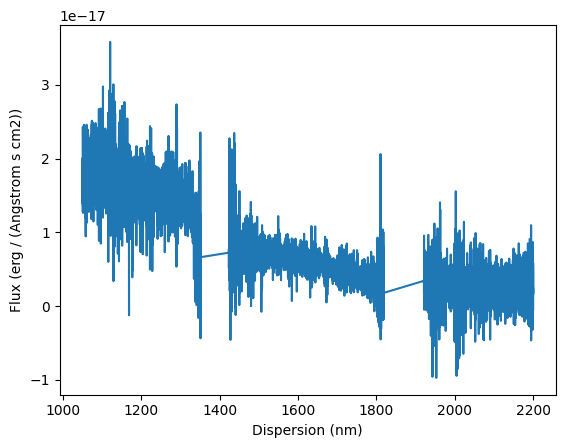

Xshooter_NIR_ULASJ135058.85+081506.8.txt is plottable



In [12]:
# Process ULASJ135058.85+081506.8.txt, ULAS J135058.86+081506.8
# imcomplete: can't find this source in the paper Burgasser et al. 2004
# Not ingesting this spectrum for now
from specutils.manipulation import extract_region
from specutils import Spectrum, SpectralRegion
for filename in os.listdir(path):
    if "Xshooter_NIR_ULASJ135058.85+081506.8" in filename:
        print(f"Processing {filename}")
        file_path = os.path.join(path, filename)
        data = np.loadtxt(file_path, comments="#", encoding="latin1")

        wavelength = data[:, 0] * u.nm
        flux = data[:, 1] * (u.erg / u.cm**2 / u.s / u.AA)

        spectrum = Spectrum(flux=flux, spectral_axis=wavelength)
        spectrum = extract_region(spectrum, SpectralRegion(1050*u.nm,2200*u.nm))
        
        if (check_spectrum_plottable(spectrum, show_plot=True)):
            print(f"{filename} is plottable\n")
